In [1]:
import gensim
import itertools
import matplotlib.pyplot as plt
import numpy as np
import re
import urllib.request
import zipfile
from collections import Counter
from gensim.models import word2vec
from janome.tokenizer import Tokenizer
from matplotlib.font_manager import FontProperties
from sklearn.decomposition import PCA

In [13]:
def preprocessing(text):
    """ 前処理を行う関数

    Arg:
        text(str)
    Return:
        text(str)
    """
    text = re.split('\-{5,}',text)[2]
    text = re.split('底本：',text)[0]
    text = text.replace('|', '')
    text = re.sub('《.+?》', '', text)
    text = re.sub('［＃.+?］', '',text)
    text = re.sub('\n\n', '\n', text) 
    text = re.sub('\r', '', text)
    return text


# 芥川龍之介「羅生門」
url = 'https://www.aozora.gr.jp/cards/000879/files/127_ruby_150.zip'
zip = '127_ruby_150.zip'

urllib.request.urlretrieve(url, zip)

with zipfile.ZipFile(zip, 'r') as myzip:
    myzip.extractall()
    for myfile in myzip.infolist():
        with open(myfile.filename, encoding='sjis') as file:
            text = file.read()

text = preprocessing(text)

In [14]:
def extract_words(text):
    """janomeから名詞・動詞・形容詞を抽出する関数

    Args:
        text(str)
    """
    tokens = t.tokenize(text)
    return [token.base_form for token in tokens 
        if token.part_of_speech.split(',')[0] in ['名詞', '動詞']]


t = Tokenizer()
sentences = text.split('。')
word_list = [extract_words(sentence) for sentence in sentences]

In [16]:
# 学習
model = word2vec.Word2Vec(word_list, size=100, min_count=5, window=5, iter=100)

# ベクトル確認
print(model.__dict__['wv']['羅生門'])

[-0.12435774 -0.0928296  -0.21227041  0.01168441 -0.10422797  0.01936843
  0.16892774  0.14822248  0.04647612  0.03463526  0.01368704  0.18922411
  0.11375152  0.44850913 -0.12615559  0.0942183   0.02484121 -0.03254252
 -0.15731055  0.17091514 -0.09072034  0.2361008   0.09366103 -0.21231578
  0.23379286  0.00428978  0.12654658 -0.12266115 -0.10998385  0.2095599
 -0.34598356  0.19161855  0.12258151 -0.09592339 -0.18811984  0.13793857
  0.19312674  0.21203391  0.049816   -0.19755103  0.12400132  0.09887454
 -0.07942662  0.12045787 -0.12915029 -0.04250821  0.20540248 -0.3226749
  0.03510875 -0.158841   -0.11870439 -0.02194624  0.11943144 -0.07560064
 -0.29610786  0.05276647 -0.2710228  -0.07886239 -0.03009902  0.01744395
  0.00602108  0.09953728  0.2343249   0.03319759 -0.08138849 -0.18943223
 -0.01175497 -0.10421355  0.10447129 -0.15304336  0.15124056 -0.26566738
  0.07428207  0.16894765 -0.3247511  -0.11495972 -0.16316305 -0.2573537
  0.01653839  0.0443515  -0.0187621   0.05045    -0.10

C:\Users\hunkn\.virtualenvs\code-WBaFQdnG\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


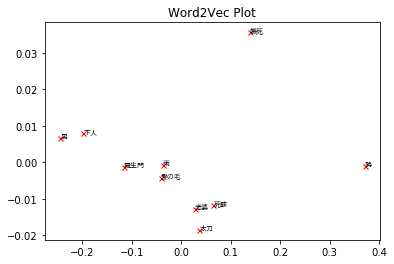

In [35]:
def append_words(view_words):
    """可視化する単語を追加する関数
    
    Args:
        words(list)
    Return:
        words(list)
    """
    wrods = []
    for i in range(len(view_words)):
        words.append([view_words[i],"r"])

    return words


font_path = 'data/TakaoPGothic.ttf'  # 日本語フォント
font_prop = FontProperties(fname=font_path)

# 手動で描画したい単語をリストに入れること
view_words = ['羅生門', '下人', '男', '鴉', '雨', '死骸', '老婆', '太刀', '髪の毛', '饑死']

# TODO:単語をランキングにして自動化
# word_list_onevec = list(itertools.chain.from_iterable(word_list))
# view_words = Counter(word_list_onevec)

words = []
words = append_words(view_words)

data = []
for i in range(len(words)):
    data.append(model[words[i][0]])

pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

# plot
for i in range(len(data_pca)):
    plt.plot(data_pca[i][0], data_pca[i][1], ms=5.0, zorder=2, marker="x", color=words[i][1])  # points
    plt.annotate(words[i][0], (data_pca[i][0], data_pca[i][1]), size=7, fontproperties=font_prop)  # texts

plt.title('Word2Vec Plot')
plt.savefig('data/word2vec_plot.png')
plt.show()